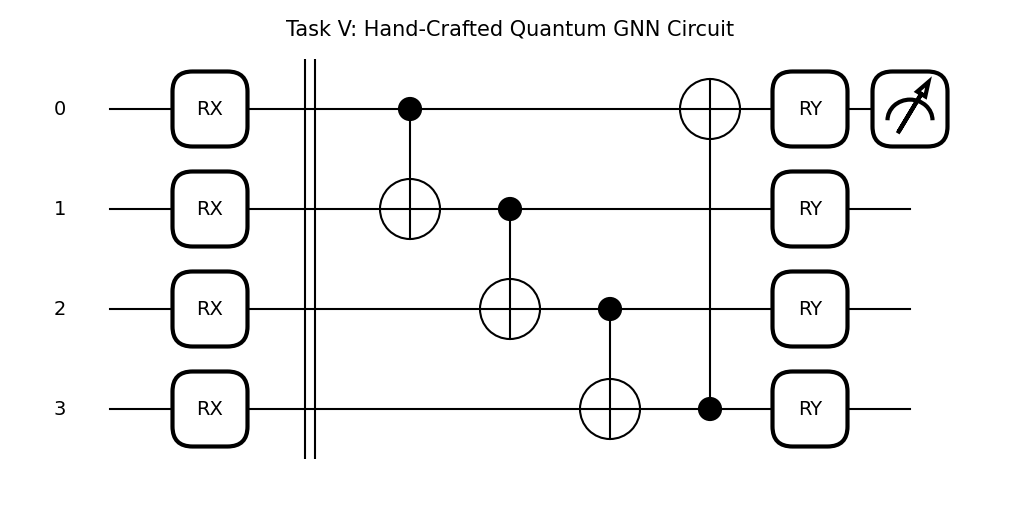

Setup for installing pytorch Geometry as it must match with version for pytorch

In [ ]:
!pip install pennylane -q
import torch

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    if version is None:
        # CUDA not found, use 'cpu' to try and get CPU-compatible wheels
        return 'cpu'
    return 'cu' + version.replace('.', '')

TORCH_version_detected = torch.__version__ # Keep original detection
TORCH_detected = format_pytorch_version(TORCH_version_detected)
CUDA_version_detected = torch.version.cuda
CUDA_detected = format_cuda_version(CUDA_version_detected)

print(f"Detected PyTorch: {TORCH_detected}, CUDA: {CUDA_detected}")
print("Installing PyTorch Geometric Dependencies...")


!pip uninstall -y torch torchvision torchaudio pytorch-cuda || true


TARGET_TORCH_VERSION = "2.3.0"
TARGET_CUDA_VERSION_STRING = "cpu" 
# Install PyTorch
!pip install torch=={TARGET_TORCH_VERSION} torchvision torchaudio --index-url https://download.pytorch.org/whl/{TARGET_CUDA_VERSION_STRING}

PYG_WHL_URL = f"https://data.pyg.org/whl/torch-{TARGET_TORCH_VERSION}+{TARGET_CUDA_VERSION_STRING}.html"

!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f {PYG_WHL_URL}
!pip install torch_geometric -q

print("Installation Complete! ✅")
print(f"Note: PyTorch was reinstalled to version {TARGET_TORCH_VERSION} for PyTorch Geometric compatibility.")
print("Please restart your Colab runtime (Runtime -> Restart runtime) for the changes to take effect.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.6/935.6 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 138.2 MB/s eta 0:00:00
Detected PyTorch: 2.9.0, CUDA: cpu
Installing PyTorch Geometric Dependencies...
Found existing installation: torch 2.9.0+cpu
Uninstalling torch-2.9.0+cpu:
  Successfully uninstalled torch-2.9.0+cpu
Found existing installation: torchvision 0.24.0+cpu
Uninstalling torchvision-0.24.0+cpu:
  Successfully uninstalled torchvision-0.24.0+cpu
Found existing installation: torchaudio 2.9.0+cpu
Uninstalling torchaudio-2.9.0+cpu:
  Successfully uninstalled

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.8/783.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.2/217.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.1 MB/s eta 0:00:00
Installation Complete! ✅
Note: PyTorch was reinstalled to version 2.3.0 for PyTorch Geometric compatibility.
Please restart your Colab runtime (Runtime -> Restart runtime) for the changes to take effect.


Downloading data from zenodo of particle jet for Task 2:

In [ ]:
# Download 1 file of the Quark/Gluon Dataset from Zenodo
!wget -O QG_jets.npz https://zenodo.org/record/3164691/files/QG_jets.npz?download=1

print("Data Downloaded! File name: QG_jets.npz")

--2026-02-01 04:55:40--  https://zenodo.org/record/3164691/files/QG_jets.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.153, 137.138.52.235, 188.185.48.75, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.153|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/3164691/files/QG_jets.npz [following]
--2026-02-01 04:55:41--  https://zenodo.org/records/3164691/files/QG_jets.npz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 106689379 (102M) [application/octet-stream]
Saving to: ‘QG_jets.npz’

QG_jets.npz         100%[===================>] 101.75M  2.10MB/s    in 3m 33s  

2026-02-01 04:59:14 (489 KB/s) - ‘QG_jets.npz’ saved [106689379/106689379]

Data Downloaded! File name: QG_jets.npz


Checking shapes and structure:

In [ ]:
import numpy as np

# Load the file
data = np.load('QG_jets.npz')

# Extract arrays
# X: (Number of Jets, Number of Particles, Features)
X = data['X']
# y: Labels (1 = Quark, 0 = Gluon)
y = data['y']

print("--- Data Shapes ---")
print(f"Total Jets: {X.shape[0]}")
print(f"Particles per Jet: {X.shape[1]}")
print(f"Features per Particle: {X.shape[2]}")
print("\n--- Example Jet (First 5 particles) ---")
# Features are usually: [pt, eta, phi, mass]
print(X[0, :5, :])

--- Data Shapes ---
Total Jets: 100000
Particles per Jet: 139
Features per Particle: 4

--- Example Jet (First 5 particles) ---
[[ 2.68769142e-01  3.56903171e-01  4.74138734e+00  2.20000000e+01]
 [ 1.60076377e-01 -2.55609533e-01  4.55022910e+00  2.20000000e+01]
 [ 1.14868731e+00 -6.24380156e-02  4.50385377e+00 -2.11000000e+02]
 [ 4.13159146e+00  1.73686350e-01  4.76622410e+00 -3.21000000e+02]
 [ 1.69599701e+00 -2.12177764e-01  4.79687162e+00 -2.11000000e+02]]


**TASK V Quantum GNN:**

Converting numpy array data into Graphs for GNN:

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import knn_graph

X_subset = X[:2000]
y_subset = y[:2000]

data_list = []

print("Converting Jets to Graphs... (Please wait)")

for i in range(len(X_subset)):
    jet_data = X_subset[i]
    label = y_subset[i]


    x_tensor = torch.tensor(jet_data, dtype=torch.float)


    mask = x_tensor[:, 0] > 0
    x_real = x_tensor[mask]  

    if x_real.shape[0] < 5:
        continue


    edge_index = knn_graph(x_real, k=10, loop=False)

    graph = Data(x=x_real, edge_index=edge_index, y=torch.tensor([label], dtype=torch.long))

    data_list.append(graph)

print(f"Success! Converted {len(data_list)} graphs.")
print("\n--- Example Graph 0 ---")
print(data_list[0])

Converting Jets to Graphs... (Please wait)
Success! Converted 2000 graphs.

--- Example Graph 0 ---
Data(x=[18, 4], edge_index=[2, 180], y=[1])


In [ ]:
import pennylane as qml
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def qgnn_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(4))
    qml.BasicEntanglerLayers(weights, wires=range(4))
    return qml.expval(qml.PauliZ(0))

train_loader = DataLoader(data_list, batch_size=64, shuffle=True)

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GNN, self).__init__()
        torch.manual_seed(12345)

        # Layer 1: Input (4 features) -> Hidden (64)
        self.conv1 = GCNConv(4, hidden_channels)

        # Layer 2: Hidden (64) -> Hidden (64)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

        # Layer 3: Projection to 4 features for the 4-qubit Quantum Layer
        self.lin = torch.nn.Linear(hidden_channels, 4)

        # weight_shapes: (Layers, Wires). Using 2 layers on 4 wires.
        weight_shapes = {"weights": (2, 4)}
        self.quantum_layer = qml.qnn.TorchLayer(qgnn_circuit, weight_shapes)

        # Final layer to convert 1 quantum output into 2 class probabilities
        self.out = torch.nn.Linear(1, 2)

    def forward(self, x, edge_index, batch):
        # 1. Message Passing (Convolution)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()

        # 2. Readout Layer (Pooling)
        x = global_mean_pool(x, batch)

        # 3. Hybrid Classification
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)            
        x = self.quantum_layer(x)  
        x = self.out(x)            

        return x

model = GNN(hidden_channels=64)
print(model)

GNN(
  (conv1): GCNConv(4, 64)
  (conv2): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=4, bias=True)
  (quantum_layer): <Quantum Torch Layer: func=qgnn_circuit>
  (out): Linear(in_features=1, out_features=2, bias=True)
)


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import pennylane as qml

# --- 1. Define Quantum Circuit ---
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev, interface="torch")
def qgnn_circuit(inputs, weights):
    # Re-uploading data into 4 qubits
    qml.AngleEmbedding(inputs, wires=range(4))
    # Trainable quantum layers
    qml.BasicEntanglerLayers(weights, wires=range(4))
    return qml.expval(qml.PauliZ(0))

# --- 2. Define Hybrid GNN Class ---
class QuantumGNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(QuantumGNN, self).__init__()
        torch.manual_seed(12345)

        # Graph Layers
        self.conv1 = GCNConv(4, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

        # Projection to 4 qubits
        self.lin_proj = torch.nn.Linear(hidden_channels, 4)

        # Quantum Layer
        weight_shapes = {"weights": (4, 4)} # 2 layers, 4 qubits
        self.quantum_layer = qml.qnn.TorchLayer(qgnn_circuit, weight_shapes)

        # Final Classifier
        self.classifier = torch.nn.Linear(1, 2)

    def forward(self, x, edge_index, batch):
        # A. Graph Processing
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()

        # B. Global Pooling (Graph -> Single Vector)
        x = global_mean_pool(x, batch) # Result: [batch_size, 64]

        # C. Projection to Quantum Space
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin_proj(x)           # Result: [batch_size, 4]

        # D. Quantum Processing

        x = self.quantum_layer(x)      # Result could be [batch_size]

        if x.dim() == 1:
            x = x.unsqueeze(1)
        elif x.shape[-1] != 1:
            x = x.reshape(-1, 1)

        # E. Final Classification
        x = self.classifier(x)         # Result: [batch_size, 2]
        return x

# --- 3. Setup Training ---
train_size = int(len(data_list) * 0.8)
train_dataset = data_list[:train_size]
test_dataset = data_list[train_size:]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = QuantumGNN(hidden_channels=64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            correct += int((pred == data.y).sum())
    return correct / len(loader.dataset)

# --- 4. Run Training ---
print(f"Using device: {device}")
print("Starting Quantum Hybrid Training...")
for epoch in range(1, 10):
    loss = train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Using device: cpu
Starting Quantum Hybrid Training...
Epoch: 01, Loss: 0.8516, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 02, Loss: 0.7142, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 03, Loss: 0.6929, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 04, Loss: 0.6929, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 05, Loss: 0.6930, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 06, Loss: 0.6930, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 07, Loss: 0.6928, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 08, Loss: 0.6928, Train Acc: 0.5175, Test Acc: 0.4975
Epoch: 09, Loss: 0.6928, Train Acc: 0.5175, Test Acc: 0.4975


Visualization of Quantum GNN circuit:

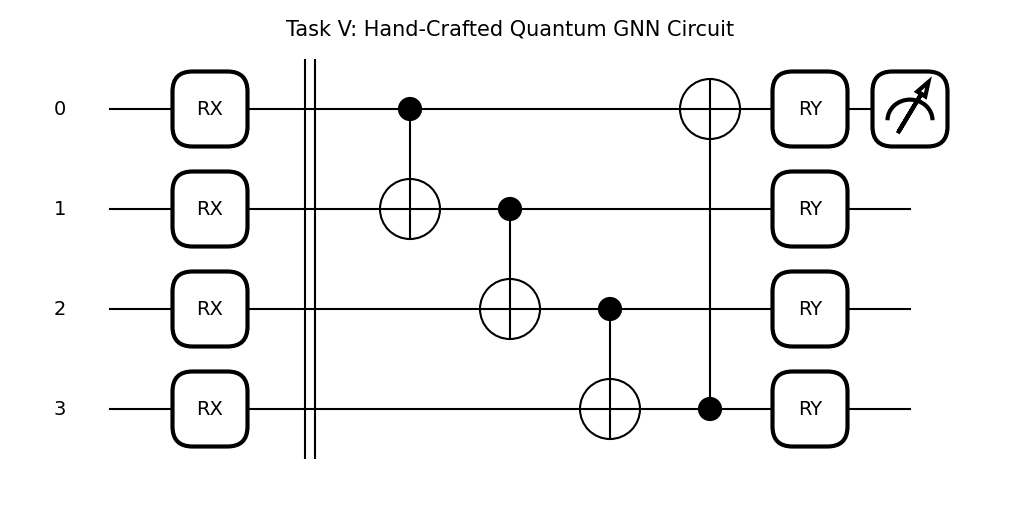

In [ ]:
import pennylane as qml
import matplotlib.pyplot as plt
import torch

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def manual_qgnn_circuit(inputs, weights):
    for i in range(4):
        qml.RX(inputs[i], wires=i)

    qml.Barrier(wires=range(4)) 


    for layer_weights in weights:
        # Entanglement (CNOT Ring)
        for i in range(4):
            qml.CNOT(wires=[i, (i + 1) % 4])

        # Rotations (RY Gates)
        for i in range(4):
            qml.RY(layer_weights[i], wires=i)

    return qml.expval(qml.PauliZ(0))

# --- Visualization Code ---
dummy_inputs = torch.tensor([0.1, 0.2, 0.3, 0.4])
dummy_weights = torch.tensor([[0.5, 0.6, 0.7, 0.8]]) # 1 Layer for clean view

fig, ax = qml.draw_mpl(manual_qgnn_circuit)(dummy_inputs, dummy_weights)
fig.suptitle("Task V: Hand-Crafted Quantum GNN Circuit", fontsize=15)
plt.show()